In [2]:
!wget https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
import scipy.io
!mv mnist.mat?raw=true mnist.mat
mat = scipy.io.loadmat('mnist.mat')

--2021-10-27 21:27:23--  https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat [following]
--2021-10-27 21:27:23--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2021-10-27 21:27:23--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [3]:

trainX = mat['trainX'] #### train on this 
trainY = np.squeeze(mat['trainY'])

testX = mat['testX'] ### only evaluate on this 
testY = np.squeeze(mat['testY'])


IndexError: ignored

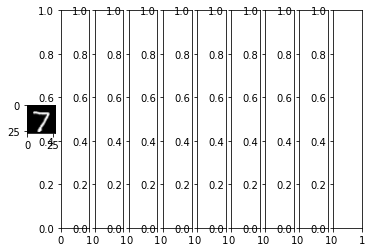

In [4]:
import numpy as np
import matplotlib.pyplot as plt

im_ix = 20

fig, ax = plt.subplots(1, 10)

for col in range(10):
  im = testX[col]
  im = np.reshape(im, (28, 28))
  ax[col].imshow(im, cmap='gray')
  ax[col].set_title(str(testY[0, col]))


In [ ]:
import time
from scipy.spatial import distance_matrix


def d(p, q):
  s = 0
  for ix in range(np.size(p)):
    s = s + (p[ix] - q[ix])**2
  return np.sqrt(s)


# number of training examples
nr_train = 10000
nr_test = 999

D = np.zeros((nr_train, nr_test))
t = time.time()

#for train_ix in range(0, nr_train):
#  for test_ix in range(0, nr_test):
#    D[train_ix, test_ix] = d(trainX[2000+train_ix, :], testX[test_ix, :])

D = distance_matrix(trainX[:nr_train, :], testX[:nr_test, :])

elapsed = time.time() - t
print("Time elapsed:", elapsed)

print(np.shape(D))

In [ ]:
# go through every column, and get the index of the smallest value
predictions = np.zeros(nr_test)
for test_ix in range(nr_test):
  smallest_value_index = np.argsort(D[:, test_ix])
  predictions[test_ix] = trainY[smallest_value_index[0]]

predictions = predictions.astype(np.int64)

In [ ]:
fig, ax = plt.subplots(1, 10)
for col in range(10):
  im = testX[col]
  im = np.reshape(im, (28, 28))
  ax[col].imshow(im, cmap='gray')
  

In [ ]:
#print("Predictions: ", predictions)
#print("Reality: ", testY[:nr_test])

In [ ]:
difference = predictions - testY[:nr_test]
percentage_success = (np.sum((difference == 0) * 1) / nr_test) * 100

percentage_success